In [2]:
import pandas as pd
import numpy as np

In [4]:
# 数据预处理
# 1.读取数据并合并
data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail3')
data1

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,6750,774,610011,NaN,NaN,白饭/大碗,0,1,10,NaN,2016-08-10 21:56:24,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1138
2775,6742,774,609996,NaN,NaN,牛尾汤,0,1,40,NaN,2016-08-10 21:56:48,NaN,NaN,NaN,0,NaN,NaN,caipu/201006.jpg,1138
2776,6756,774,609949,NaN,NaN,意文柠檬汁,0,1,13,NaN,2016-08-10 22:01:52,NaN,NaN,NaN,0,NaN,NaN,caipu/404005.jpg,1138
2777,6763,774,610014,NaN,NaN,金玉良缘,0,1,30,NaN,2016-08-10 22:03:58,NaN,NaN,NaN,0,NaN,NaN,caipu/302003.jpg,1138


In [5]:
# 数据拼接
datas = pd.concat([data1,data2,data3])
datas.shape

(10037, 19)

In [7]:
print(data1.shape,data2.shape,data3.shape)

(2779, 19) (3647, 19) (3611, 19)


In [8]:
2779 + 3647 +3611

10037

In [9]:
# 查看数据相关信息
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_inp

In [10]:
# 2.删除空值
datas.dropna(axis=1,inplace = True)
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [11]:
datas

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442
...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094


In [19]:
# 任务一：统计卖出菜品的平均价格
# datas['amounts'].mean()
# np.mean(datas['amounts'])
round(datas['amounts'].mean(),3) #round(数据，需要保留的小数位数)

44.821

In [24]:
# 任务二：想看看这个月咱们店里哪些菜卖得好？
# for i in datas[['dishes_name','counts']].groupby('dishes_name'):print(i)
# 分组聚合，求每个菜卖出
dishes_name_sum = datas[['dishes_name','counts']].groupby('dishes_name').sum()
dishes_name_sort = dishes_name_sum.sort_values(['counts'],ascending = False)
dishes_name_sort[2:] # 切片

,counts
dishes_name,
凉拌菠菜,272
谷稻小庄,243
麻辣小龙虾,219
五色糯米饭(七色),195
蛋挞,192
...,...
蒙古烤羊腿\r\n,3
五香酱驴肉\r\n,2
张裕葡萄酒张裕赤霞珠干红\r\n,2


In [31]:
import matplotlib.pyplot as plt
# 显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 支持符号
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

NameError: name 'rcParams' is not defined

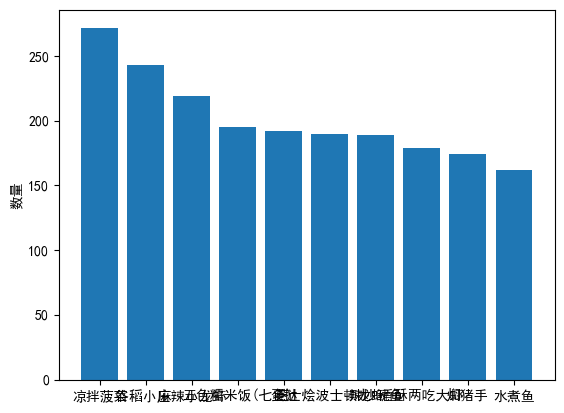

In [34]:
x_data = dishes_name_sort[2:12].index
y_data = dishes_name_sort['counts'][2:12].values
plt.bar(x_data,y_data)
plt.ylabel('数量')
plt.show()

In [37]:
# 任务三：查看点菜种类最多的订单
order_id_sum = datas[['order_id','dishes_name']].groupby('order_id')
datas['order_id'].value_counts()


398     36
1295    29
1078    27
465     27
582     27
        ..
310      3
1035     2
703      2
1064     1
1320     1
Name: order_id, Length: 942, dtype: int64

In [41]:
datas['place_order_time'].iloc[0]

Timestamp('2016-08-01 11:05:36')

In [53]:
# 任务四：统计一天当中什么时间段生意最好，hour
def hours(x,dt):
    #dt表示是需要获取的数据类型
    if dt == 'hours':
        return x.hour
    if dt == 'day':
        return x.day
# 传参方式：第一种使用args
# datas['time_hour']= datas['place_order_time'].apply(hours,args=('hours',)) # 位置参数
# 第二种
datas['time_hour']= datas['place_order_time'].apply(hours,**{'dt':'hours'}) # 关键字参数
datas

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,time_hour
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,11
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,11
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,11
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,11
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,21
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,21
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,21
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,21


In [51]:
# count()是统计有效数据量
time_hour_count =datas['time_hour'].groupby(datas['time_hour']).count()
time_hour_count

time_hour
11     960
12     842
13     823
14     117
17    1092
18    1564
19    1464
20    1531
21    1469
22     175
Name: time_hour, dtype: int64

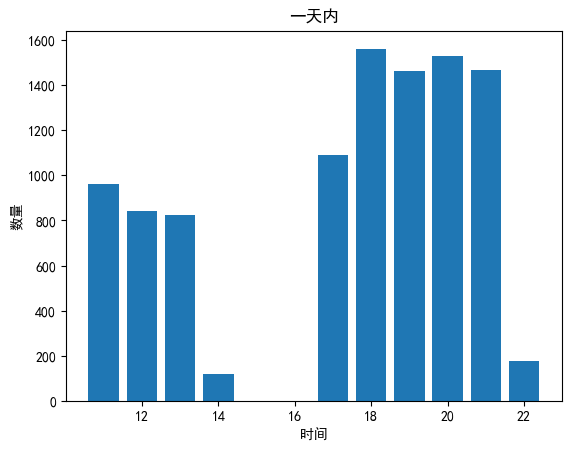

In [52]:
# 可视化
plt.bar(time_hour_count.index,time_hour_count.values)
plt.xlabel('时间')
plt.ylabel('数量')
# 设置标题
plt.title('一天内每个小时菜品销售情况')
# 展示图像
plt.show()

In [56]:
# 任务五：统计哪一天点菜最多 day：map apply applymap
datas['time_day']= datas['place_order_time'].apply(hours,**{'dt':'day'})
datas

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,time_hour,time_day
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,1,1
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,1,1
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,1,1
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,1,1
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,31,31
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,31,31
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,31,31
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,31,31


In [57]:
time_day_count = datas['time_day'].groupby(datas['time_day']).count()
time_day_count

time_day
1     217
2     138
3     157
4     144
5     193
6     706
7     696
8     160
9     146
10    222
11    176
12    177
13    756
14    691
15    211
16    103
17    206
18    214
19    226
20    887
21    778
22    146
23    180
24    145
25    136
26    200
27    725
28    814
29    148
30    154
31    185
Name: time_day, dtype: int64

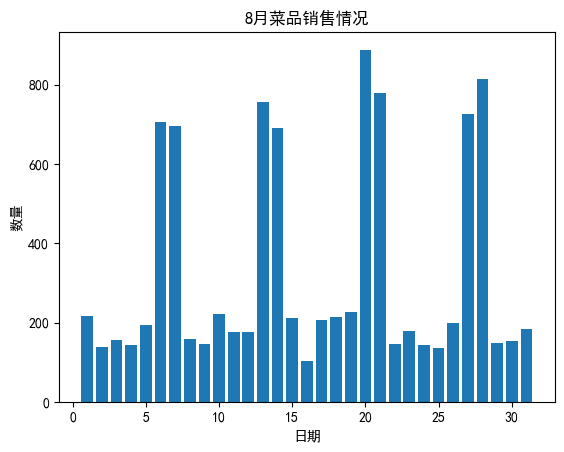

In [58]:
# 可视化
plt.bar(time_day_count.index,time_day_count.values)
plt.xlabel('日期')
plt.ylabel('数量')
# 设置标题
plt.title('8月菜品销售情况')
# 展示图像
plt.show()

In [59]:
!pip install pyecharts

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.
